In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [3]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [4]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [5]:
#get data
series = pd.read_csv('../data/catfish.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series = series.asfreq(pd.infer_freq(series.index))
series = series.loc[datetime(2004,1,1):]
series = series.diff().diff().dropna()

In [6]:
#check stationarity
perform_adf_test(series)

ADF Statistic: -7.162321
p-value: 0.000000


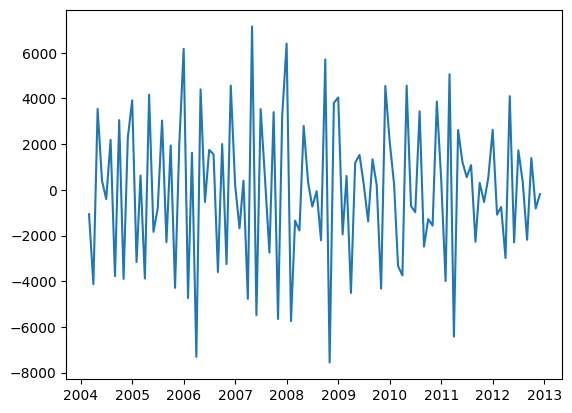

In [7]:
plt.plot(series)

/home/ubuntu/Documents/Projects/msci_data/.venv/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


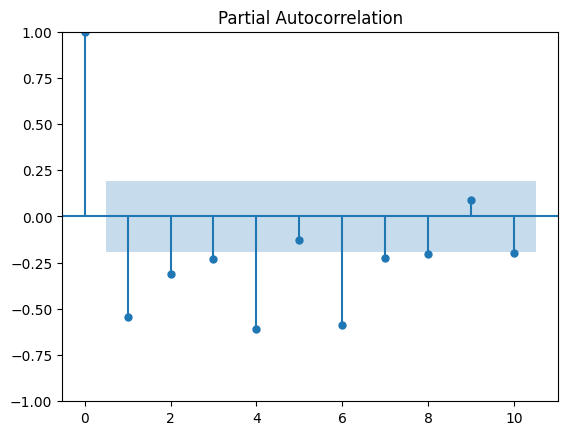

In [8]:
plot_pacf(series, lags=10)
plt.show()

# AR(4) seems to be reasonable enough

In [9]:
ARIMA?

Init signature:
ARIMA(
    endog,
    exog=None,
    order=(0, 0, 0),
    seasonal_order=(0, 0, 0, 0),
    trend=None,
    enforce_stationarity=True,
    enforce_invertibility=True,
    concentrate_scale=False,
    trend_offset=1,
    dates=None,
    freq=None,
    missing='none',
    validate_specification=True,
)
Docstring:     
Autoregressive Integrated Moving Average (ARIMA) model, and extensions

This model is the basic interface for ARIMA-type models, including those
with exogenous regressors and those with seasonal components. The most
general form of the model is SARIMAX(p, d, q)x(P, D, Q, s). It also allows
all specialized cases, including

- autoregressive models: AR(p)
- moving average models: MA(q)
- mixed autoregressive moving average models: ARMA(p, q)
- integration models: ARIMA(p, d, q)
- seasonal models: SARIMA(P, D, Q, s)
- regression with errors that follow one of the above ARIMA-type models

Parameters
----------
endog : array_like, optional
    The observed time-se

In [12]:
ar_model = ARIMA(series, order=(4,0,0))
ar_model_fit = ar_model.fit()

In [17]:
print(ar_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                  106
Model:                 ARIMA(4, 0, 0)   Log Likelihood                -957.805
Date:                Thu, 16 Mar 2023   AIC                           1927.610
Time:                        16:05:08   BIC                           1943.591
Sample:                    03-01-2004   HQIC                          1934.087
                         - 12-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.0749     59.076     -0.323      0.747    -134.862      96.712
ar.L1         -0.9029      0.105     -8.620      0.000      -1.108      -0.698
ar.L2         -0.7355      0.121     -6.098      0.0

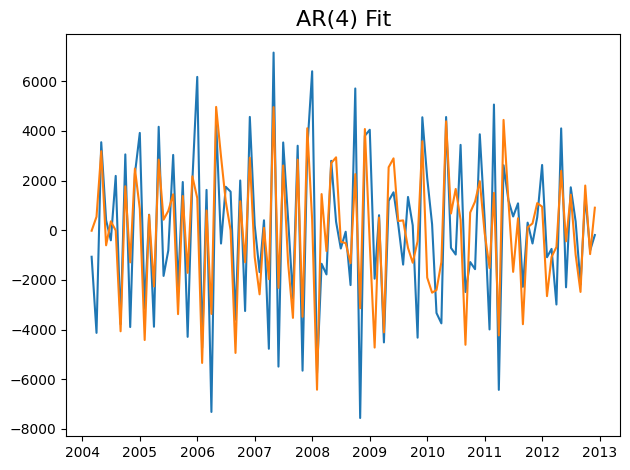

In [15]:
plt.plot(series)
plt.plot(ar_model_fit.fittedvalues)
plt.title('AR(%s) Fit'%4, fontsize=16)

plt.tight_layout()